In [1]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from ipywidgets import interactive
from ipykernel.pylab.backend_inline import flush_figures
from xgboost import XGBClassifier

/usr/lib/python3.6/json/encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-11-06 21:19:10.309989. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [3]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

#### Load data 

In [4]:
data = pd.read_csv("../data/train.csv", na_values=[-1, -1.0], index_col="id")

In [5]:
X, y = data.loc[:, data.columns != "target"], data.target

#### Preprocess 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

/usr/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


####  Random Forest

In [8]:
%%time
model = RandomForestClassifier()
model.fit(X_train.fillna(X_train.median()), y_train)
y_pred = model.predict(X_test.fillna(X_test.median()))
rf_gini = gini_normalized(y_test, y_pred)
print(rf_gini)

-0.00897630832771
CPU times: user 11.9 s, sys: 83 ms, total: 11.9 s
Wall time: 11.9 s


#### K-Nearest-Neighbors 

In [9]:
%%time
model = KNeighborsClassifier()
model.fit(X_train.fillna(X_train.median()), y_train)
y_pred = model.predict(X_test.fillna(X_test.median()))
knn_gini = gini_normalized(y_test, y_pred)
print(knn_gini)

-0.00945499815958
CPU times: user 13min 30s, sys: 123 ms, total: 13min 31s
Wall time: 13min 31s


#### Neural Networks (MLP) 

In [12]:
%%time
model = MLPClassifier()
model.fit(X_train.fillna(X_train.median()), y_train)
y_pred = model.predict(X_test.fillna(X_test.median()))
nn_gini = gini_normalized(y_test, y_pred)
print(nn_gini)

-0.00906637852435
CPU times: user 3min 47s, sys: 470 ms, total: 3min 47s
Wall time: 3min 47s


#### Gradient Boosting 

In [10]:
%%time
model = GradientBoostingClassifier()
model.fit(X_train.fillna(X_train.median()), y_train)
y_pred = model.predict(X_test.fillna(X_test.median()))
gb_gini = gini_normalized(y_test, y_pred)
print(gb_gini)

-0.0090866415818
CPU times: user 2min 58s, sys: 70 ms, total: 2min 58s
Wall time: 2min 58s


#### AdaBoost 

In [11]:
%%time
model = AdaBoostClassifier()
model.fit(X_train.fillna(X_train.median()), y_train)
y_pred = model.predict(X_test.fillna(X_test.median()))
ada_gini = gini_normalized(y_test, y_pred)
print(ada_gini)

-0.00906637852435
CPU times: user 40 s, sys: 43.3 ms, total: 40 s
Wall time: 40.1 s


#### XGBoost 

In [28]:
%%time
model = XGBClassifier(n_jobs=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
xg_gini = gini_normalized(y_test, y_pred)
print(xg_gini)

-0.00290216938067
CPU times: user 1min 39s, sys: 260 ms, total: 1min 40s
Wall time: 34.2 s


#### Support Vector Machines 

In [14]:
%%time
model = SVC()
model.fit(X_train.fillna(X_train.median()), y_train)
y_pred = model.predict(X_test.fillna(X_test.median()))
svm_gini = gini_normalized(y_test, y_pred)
print(svm_gini)

-0.00906637852435
CPU times: user 11h 29min 37s, sys: 2.08 s, total: 11h 29min 39s
Wall time: 11h 29min 52s


#### Results 

<Container object of 6 artists>

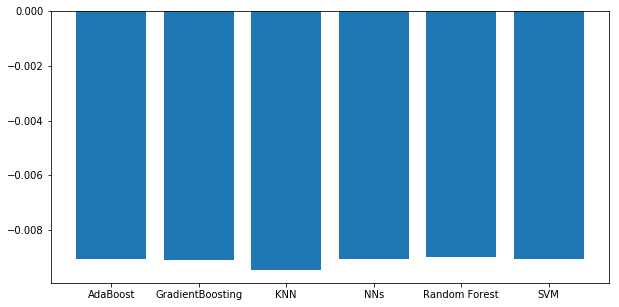

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(["Random Forest", "GradientBoosting", "AdaBoost", "XGBoost", "KNN", "NNs", "SVM"], [rf_gini, gb_gini, ada_gini, xg_gini, knn_gini, nn_gini, svm_gini])